### 필수과제 (다음 주까지 제출)
### 3주차 모두 과제가 다 제출할  수 있음
- sklean에서 제공하는 california housing 데이터 존재 코드 공유 예정
- 집값 다른 여러 피처들이 존재
- 전체 피처를 학습하고 MSE 계산한 것과, 여러분들이 직접 filter 방식으로 상관계수를 통해 피처를 선택해서 학습한 후 mse 비교
- 어떤 피처를 선택했는지, 그리고 추가로 집값에 대한 데이터라 도메인을 좀 더 추가해서 어떤 식으로 선택하면 더 좋을지 추가!

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 캘리포니아 주택 데이터셋 불러오기
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [2]:
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [3]:
# 2. 기본 정보 확인
print(X.info())        # 데이터 구조

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [4]:
print(X.describe())    # 통계적 요약

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [5]:
df = pd.concat([X,pd.DataFrame(y, columns=['House_value'])], axis=1)
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  House_value  
0      

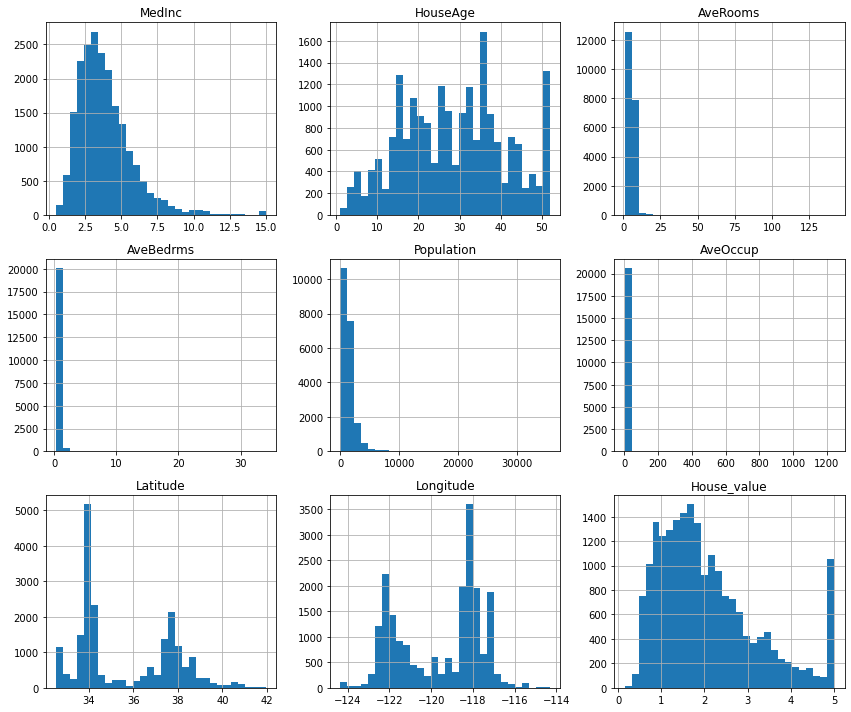

In [6]:
# 3. 시각화 - 각 특성의 분포를 히스토그램으로 시각화
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

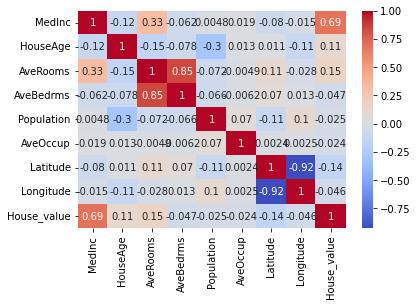

<Figure size 720x360 with 0 Axes>

In [7]:
# 4. 시각화 - 특성 간 상관관계를 히트맵으로 시각화
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(10,5))
plt.show()

In [8]:
#LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=111)

#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse',mse_selected)

mse 0.5405661575783066


# Feature Selection

## 다중 공선성 문제
- AveRooms와 Averms 사이
- Latitude와 Longitude 사이
- label과 상관계수가 더 작은 AveBedrms와 Longitude 제거

## 낮은 상관 계수
- Population 
- AveOccup



In [9]:
# AveBedrms, Longitude 컬럼 제거
X_selected = X.drop(columns=['AveBedrms', 'Longitude',])

# 결과 출력
print(X_selected.head())

   MedInc  HouseAge  AveRooms  Population  AveOccup  Latitude
0  8.3252      41.0  6.984127       322.0  2.555556     37.88
1  8.3014      21.0  6.238137      2401.0  2.109842     37.86
2  7.2574      52.0  8.288136       496.0  2.802260     37.85
3  5.6431      52.0  5.817352       558.0  2.547945     37.85
4  3.8462      52.0  6.281853       565.0  2.181467     37.85


In [10]:
#LinearRegression

#데이터 분할 _선택된 피처로
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2,random_state=111)

#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse_selected',mse_selected)

mse_selected 0.6648951891632682


In [11]:
# Population, AveOccup 컬럼 제거
X_selected = X.drop(columns=['Population', 'AveOccup'])

# 결과 출력
print(X_selected.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081     37.85    -122.25


In [12]:
#LinearRegression

#데이터 분할 _선택된 피처로
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2,random_state=111)

#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse_selected',mse_selected)

mse_selected 0.5418247519589297


In [13]:
# AveBedrms, Longitude, Population, AveOccup 컬럼 제거
X_selected = X.drop(columns=['AveBedrms', 'Longitude', 'Population', 'AveOccup'])

# 결과 출력
print(X_selected.head())

   MedInc  HouseAge  AveRooms  Latitude
0  8.3252      41.0  6.984127     37.88
1  8.3014      21.0  6.238137     37.86
2  7.2574      52.0  8.288136     37.85
3  5.6431      52.0  5.817352     37.85
4  3.8462      52.0  6.281853     37.85


In [14]:
#LinearRegression

#데이터 분할 _선택된 피처로
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2,random_state=111)

#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse_selected',mse_selected)

mse_selected 0.6672473089215661


## 전체 특성 MSE
- mse 0.5405661575783066

## 선택 특성 MSE
### AveBedrms, Longitude 컬럼 제거
- mse_selected 0.6648951891632682
### Population, AveOccup 컬럼 제거
- mse_selected 0.5418247519589297
### AveBedrms, Longitude, Population, AveOccup 컬럼 제거
- mse_selected 0.6672473089215661

Feature의 개수가 적어서 그런지 Feature Selection 이후의 mse가 더 올라가는 모습임.

집 값에 대한 데이터이므로, 집 값에 영향을 미칠 수 있는 역까지의 절대 거리, 실제 이동거리 또는 범죄율, 교육 환경 등의 도메인을 추가해서 다양한 Feature를 얻고 이들의 상관 계수를 파악해서 Selection을 진행한다면 accuracy를 올릴 수 있을 것으로 기대함.